In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [14]:
# Calculate the date 1 year ago from today
# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date.between('2016-01-01', '2017-01-01')).all()
                                       
year_precip

[('2016-01-01', 0.0),
 ('2016-01-02', 0.0),
 ('2016-01-03', 0.0),
 ('2016-01-04', 0.0),
 ('2016-01-05', 0.0),
 ('2016-01-06', 0.0),
 ('2016-01-07', 0.18),
 ('2016-01-08', 0.01),
 ('2016-01-09', 0.03),
 ('2016-01-10', 0.01),
 ('2016-01-11', 0.0),
 ('2016-01-12', 0.0),
 ('2016-01-13', 0.0),
 ('2016-01-14', 0.0),
 ('2016-01-15', 0.0),
 ('2016-01-16', 0.01),
 ('2016-01-17', 0.0),
 ('2016-01-18', 0.0),
 ('2016-01-19', 0.0),
 ('2016-01-20', 0.0),
 ('2016-01-21', 0.0),
 ('2016-01-22', 0.0),
 ('2016-01-23', 0.0),
 ('2016-01-24', 0.0),
 ('2016-01-25', 0.04),
 ('2016-01-26', 0.16),
 ('2016-01-27', 0.01),
 ('2016-01-28', 0.0),
 ('2016-01-29', 0.0),
 ('2016-01-30', 0.0),
 ('2016-01-31', 0.0),
 ('2016-02-01', 0.0),
 ('2016-02-02', 0.06),
 ('2016-02-03', 0.0),
 ('2016-02-04', 0.0),
 ('2016-02-05', 0.0),
 ('2016-02-06', 0.0),
 ('2016-02-07', 0.02),
 ('2016-02-08', 0.01),
 ('2016-02-09', 0.0),
 ('2016-02-10', 0.0),
 ('2016-02-11', 0.0),
 ('2016-02-12', 0.02),
 ('2016-02-13', 0.0),
 ('2016-02-14', 0.0)

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame(year_precip)

index_date_df = precip_df.set_index('date')

index_date_df.head()

,prcp
date,
2016-01-01,0.0
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,0.0


In [16]:
# Sort the dataframe by date

sorted_precip = index_date_df.sort_values(by=['date'])

sorted_precip.head()

,prcp
date,
2016-01-01,0.00
2016-01-01,0.02
2016-01-01,0.00
2016-01-01,0.02
2016-01-01,0.00


In [17]:
date = sorted_precip.index

print(date)

Index(['2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
       '2016-01-01', '2016-01-02', '2016-01-02', '2016-01-02', '2016-01-02',
       ...
       '2016-12-31', '2016-12-31', '2016-12-31', '2016-12-31', '2017-01-01',
       '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01'],
      dtype='object', name='date', length=2315)


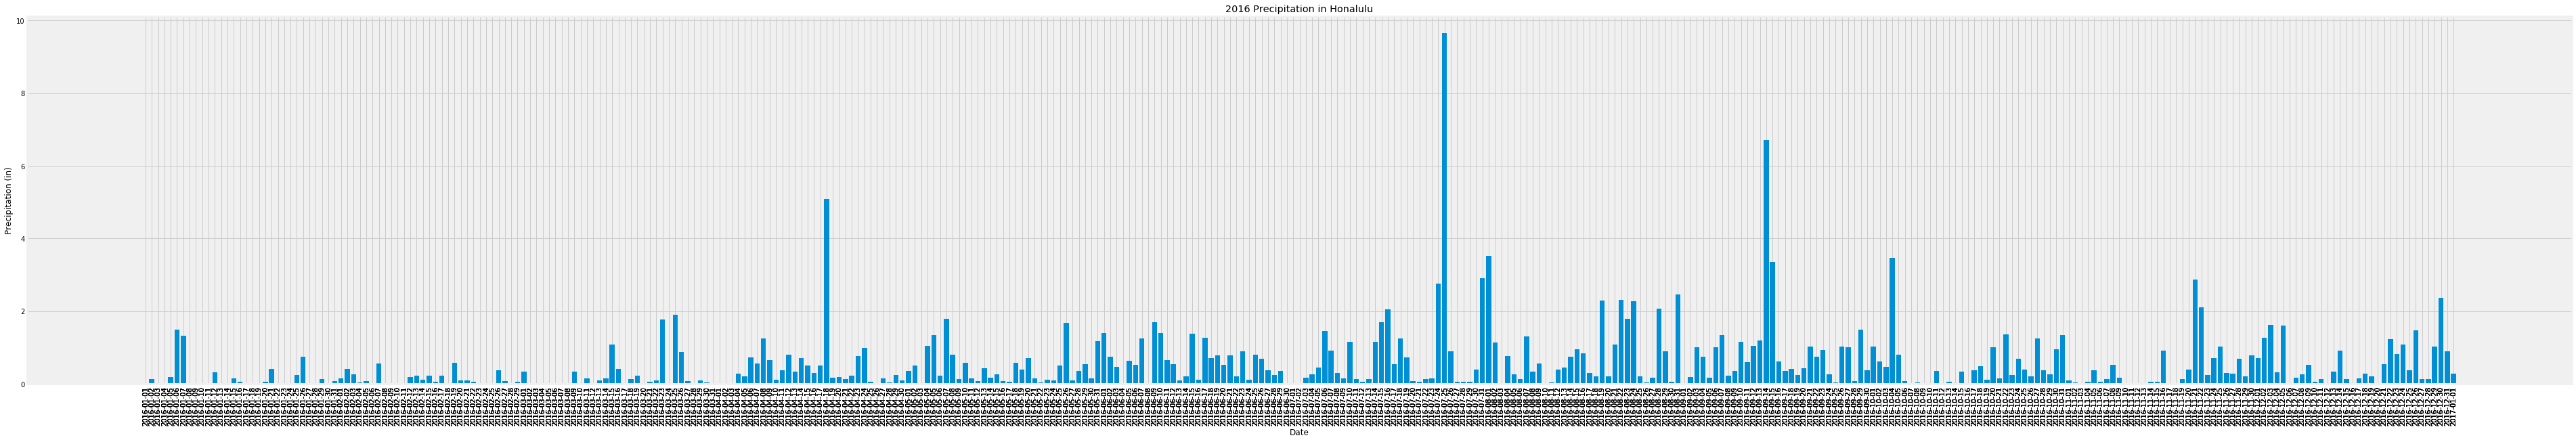

In [18]:
fig, ax = plt.subplots(figsize=(60,10))

rects = ax.bar(sorted_precip.index, sorted_precip.prcp)

ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in)')
ax.set_title('2016 Precipitation in Honalulu')
plt.xticks(sorted_precip.index, sorted_precip.index, rotation=90)
plt.show()

![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_precip.describe(percentiles=None, include=None, exclude=None)

,prcp
count,2074.000000
mean,0.179581
std,0.505810
min,0.000000
25%,0.000000
50%,0.020000
75%,0.150000
max,9.640000


In [20]:
# How many stations are available in this dataset?
station_count = session.query(func.distinct(Measurement.station)).count()

station_count


9

In [21]:
# What are the most active stations?
# List the stations and the counts in descending order.

station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = station_activity[0][0]

most_active


'USC00519281'

In [23]:
min_max_avg = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

min_max_avg

[(53.0, 87.0, 73.09795396419437)]

In [24]:
year_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
        filter(Measurement.date.between('2016-01-01' , '2017-01-01')).\
        filter(Measurement.station == most_active).all()

year_temp

[('USC00519281', '2016-01-01', 74.0),
 ('USC00519281', '2016-01-02', 72.0),
 ('USC00519281', '2016-01-03', 68.0),
 ('USC00519281', '2016-01-04', 69.0),
 ('USC00519281', '2016-01-05', 70.0),
 ('USC00519281', '2016-01-06', 69.0),
 ('USC00519281', '2016-01-07', 76.0),
 ('USC00519281', '2016-01-08', 75.0),
 ('USC00519281', '2016-01-09', 74.0),
 ('USC00519281', '2016-01-10', 74.0),
 ('USC00519281', '2016-01-11', 73.0),
 ('USC00519281', '2016-01-12', 75.0),
 ('USC00519281', '2016-01-13', 74.0),
 ('USC00519281', '2016-01-14', 66.0),
 ('USC00519281', '2016-01-15', 71.0),
 ('USC00519281', '2016-01-16', 73.0),
 ('USC00519281', '2016-01-17', 75.0),
 ('USC00519281', '2016-01-18', 63.0),
 ('USC00519281', '2016-01-19', 61.0),
 ('USC00519281', '2016-01-20', 62.0),
 ('USC00519281', '2016-01-21', 65.0),
 ('USC00519281', '2016-01-22', 65.0),
 ('USC00519281', '2016-01-23', 75.0),
 ('USC00519281', '2016-01-24', 78.0),
 ('USC00519281', '2016-01-25', 69.0),
 ('USC00519281', '2016-01-26', 65.0),
 ('USC005192

In [25]:
temp_df = pd.DataFrame(year_temp)

index_temp_df = temp_df.set_index('date')

index_temp_df.head()

,station,tobs
date,,
2016-01-01,USC00519281,74.0
2016-01-02,USC00519281,72.0
2016-01-03,USC00519281,68.0
2016-01-04,USC00519281,69.0
2016-01-05,USC00519281,70.0


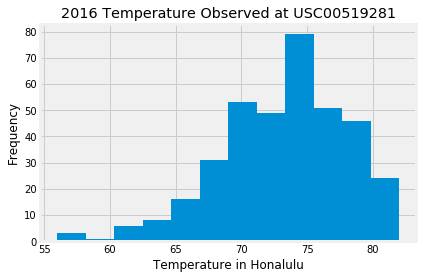

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(index_temp_df.tobs , bins=12)
plt.xlabel("Temperature in Honalulu")
plt.ylabel("Frequency")
plt.title("2016 Temperature Observed at " + most_active)
plt.show()

In [27]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2016-02-01', '2016-02-11')

[(56.0, 68.10958904109589, 78.0)]

In [31]:
start= '2017-1-1'

start_date = dt.datetime.strptime(start, '%Y-%m-%d')

session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).all()


[(58.0, 74.1646297627606, 87.0)]

# Temperature Analysis (Optional)

<IPython.core.display.Javascript object>


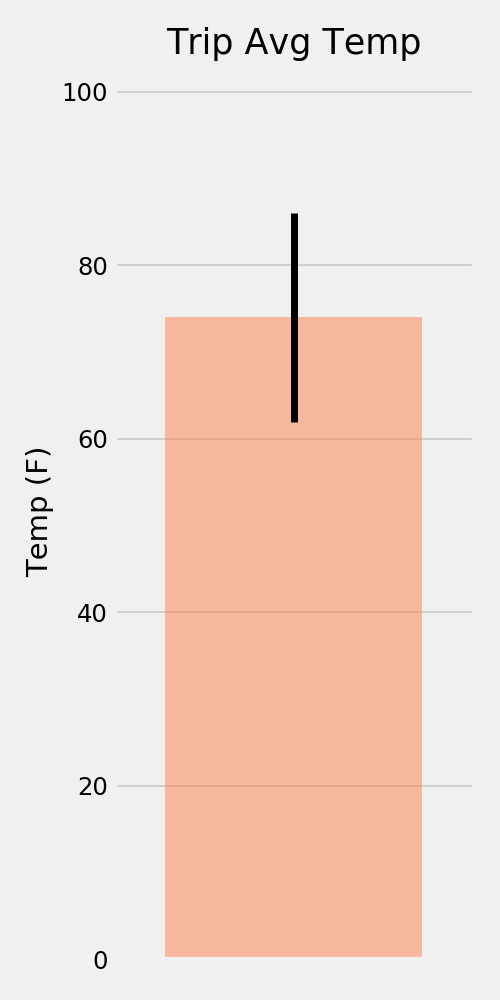

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


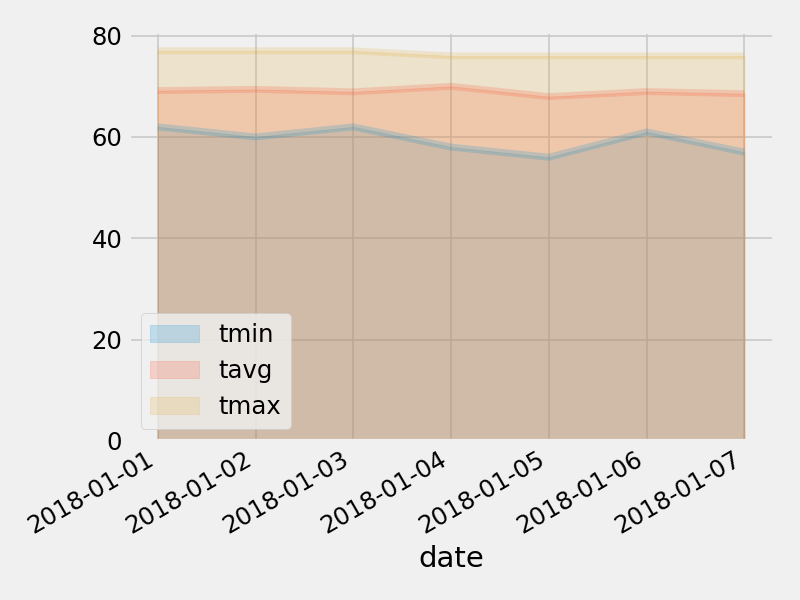

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
